# ***`SVC IMPLEMENTATION`***

# ***DATASET -1 -> https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib.colors import ListedColormap

In [ ]:
data = pd.read_csv("/content/Student_Performance (1).csv")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
le = LabelEncoder()
data["Extracurricular Activities"] = le.fit_transform(data["Extracurricular Activities"])

In [ ]:
def categorize_score(score):
    if score <= 50:
        return "Low"
    elif 50 < score <= 70:
        return "Medium"
    else:
        return "High"

data["Performance Category"] = data["Performance Index"].apply(categorize_score)

In [ ]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Performance Category
0,7,99,1,9,1,91.0,High
1,4,82,0,4,2,65.0,Medium
2,8,51,1,7,2,45.0,Low
3,5,52,1,5,2,36.0,Low
4,7,75,0,8,5,66.0,Medium
...,...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0,Low
9996,7,64,1,8,5,58.0,Medium
9997,6,83,1,8,5,74.0,High
9998,9,97,1,7,0,95.0,High


In [ ]:
X = data.drop(["Performance Index", "Performance Category"], axis=1)
y = data["Performance Category"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

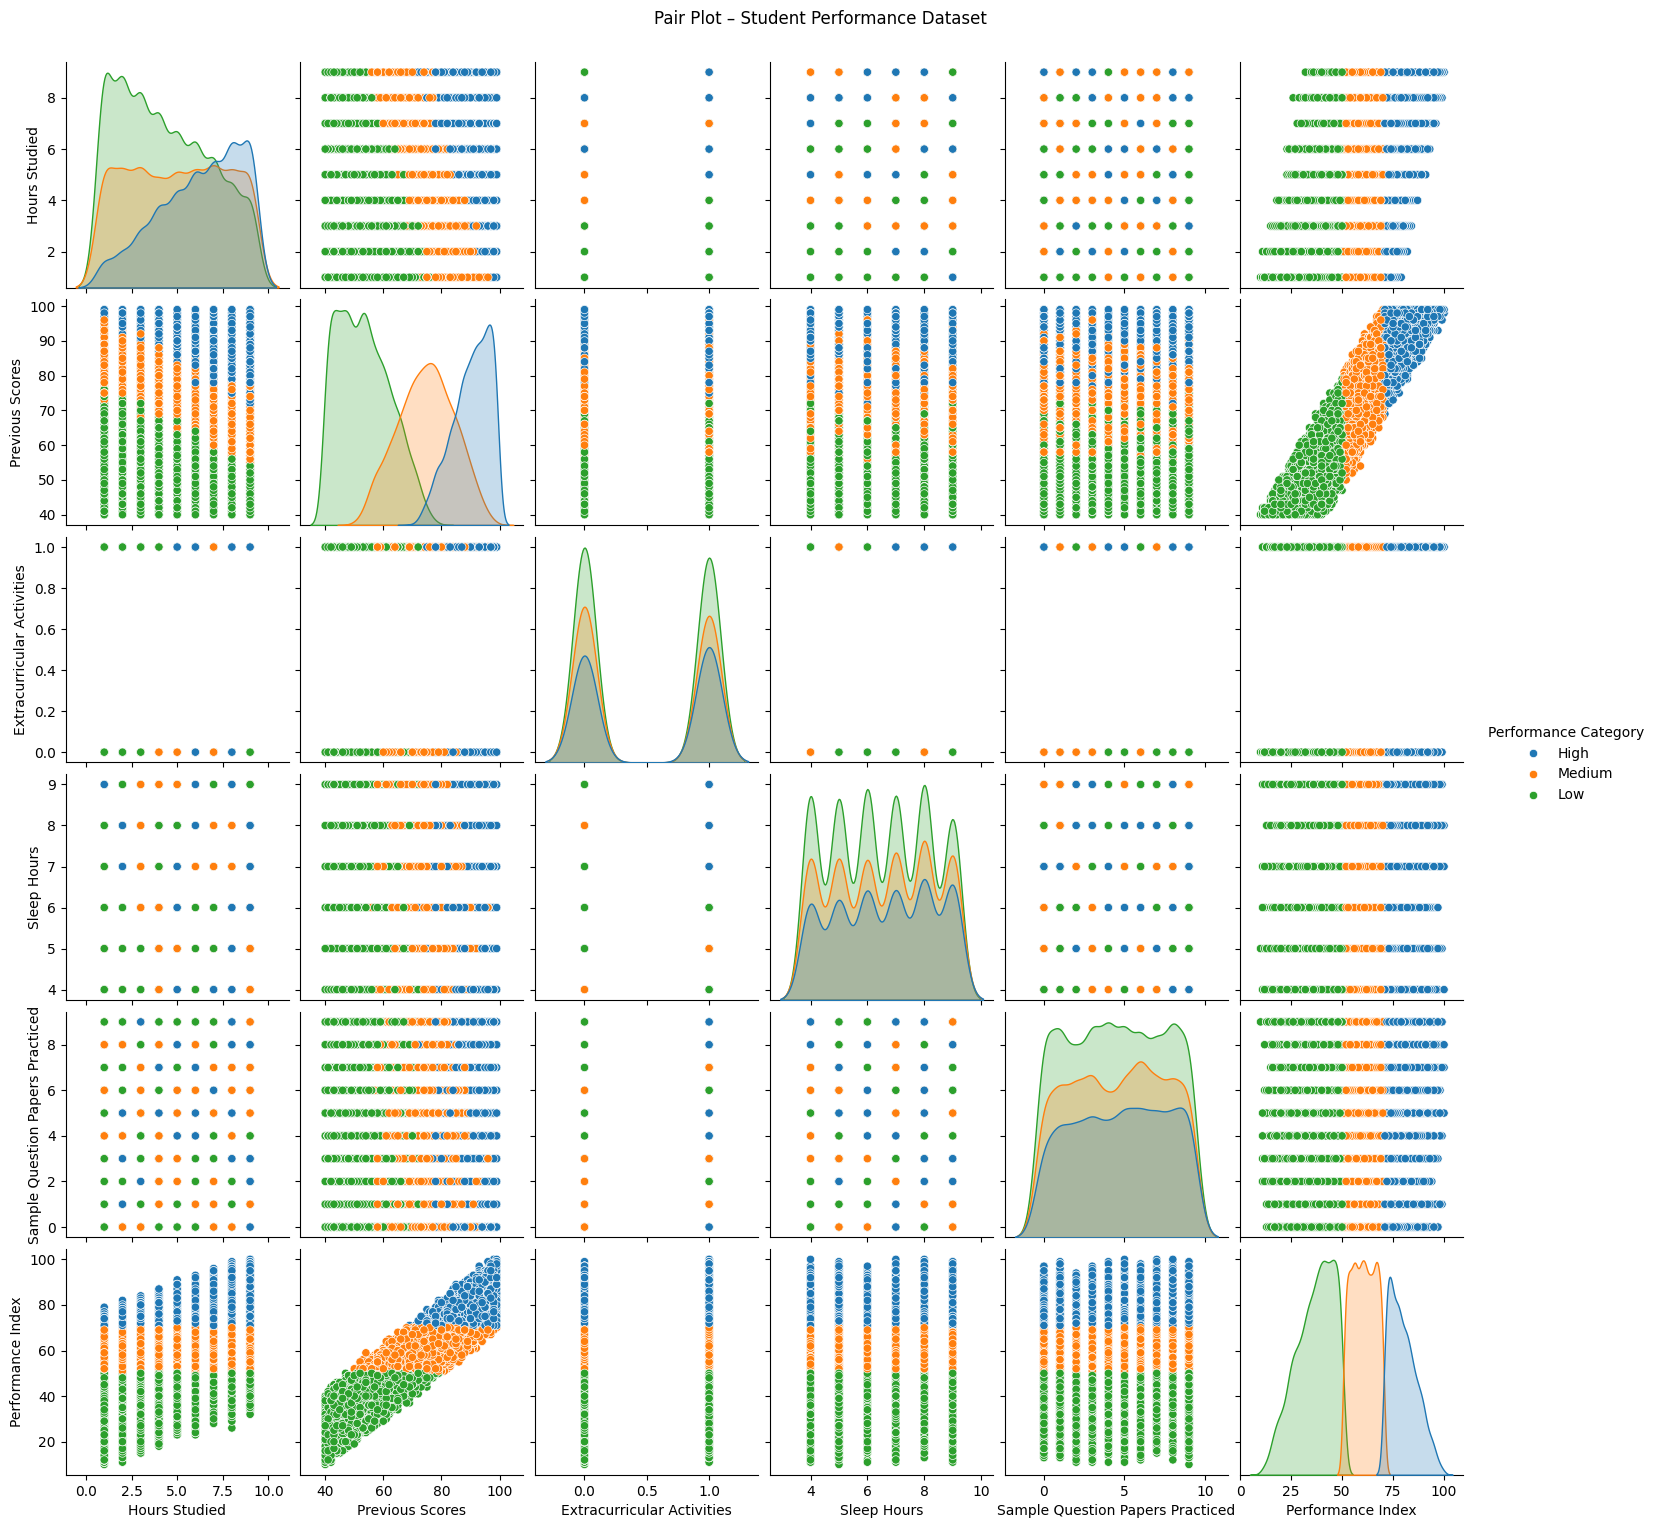

In [ ]:
sns.pairplot(data, hue="Performance Category", diag_kind="kde")
plt.suptitle("Pair Plot – Student Performance Dataset", y=1.02)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Kernel: linear
Accuracy: 0.941
Classification Report:
              precision    recall  f1-score   support

        High       0.94      0.95      0.95       496
         Low       0.96      0.96      0.96       866
      Medium       0.91      0.90      0.91       638

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



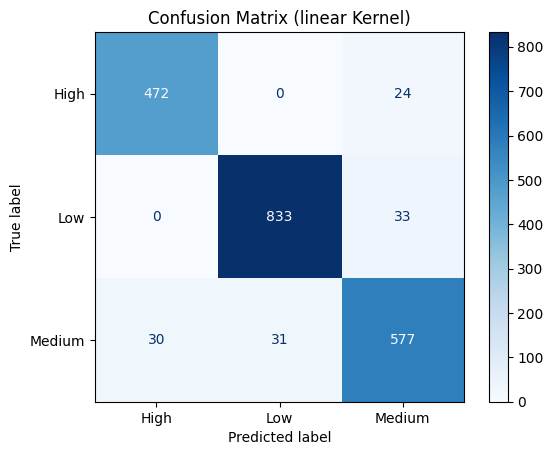


Kernel: poly
Accuracy: 0.933
Classification Report:
              precision    recall  f1-score   support

        High       0.95      0.92      0.93       496
         Low       0.97      0.95      0.96       866
      Medium       0.88      0.92      0.90       638

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



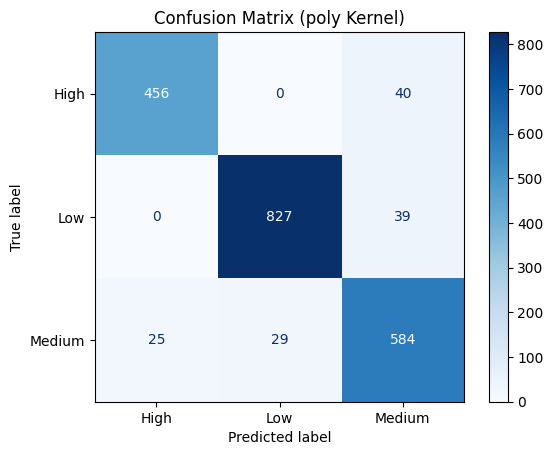


Kernel: rbf
Accuracy: 0.944
Classification Report:
              precision    recall  f1-score   support

        High       0.94      0.96      0.95       496
         Low       0.97      0.96      0.97       866
      Medium       0.92      0.91      0.91       638

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



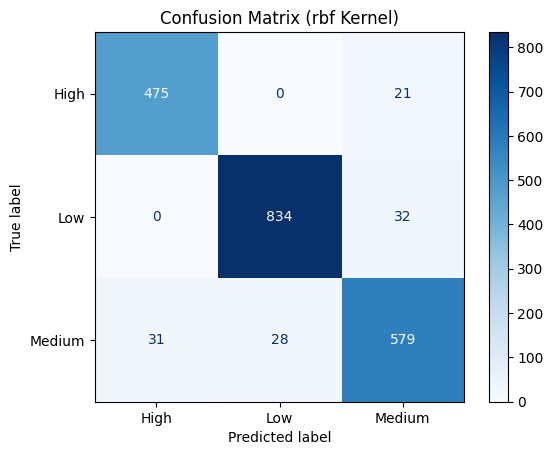


Kernel: sigmoid
Accuracy: 0.801
Classification Report:
              precision    recall  f1-score   support

        High       0.81      0.80      0.80       496
         Low       0.90      0.86      0.88       866
      Medium       0.68      0.72      0.70       638

    accuracy                           0.80      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.81      0.80      0.80      2000



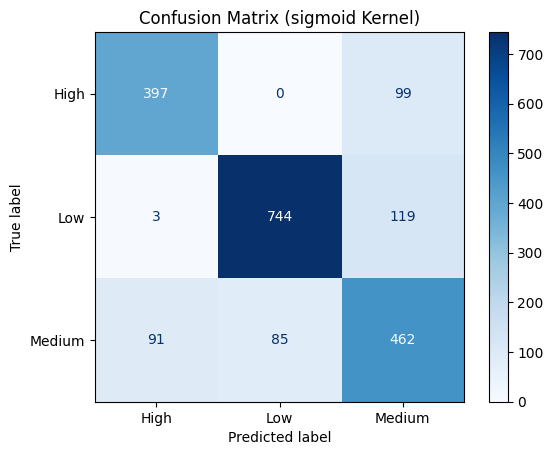

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for k in kernels:
    svc = SVC(kernel=k)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((k, acc))

    print(f"\nKernel: {k}")
    print("Accuracy:", round(acc, 3))
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)
    cm = confusion_matrix(y_test, y_pred, labels=svc.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix ({k} Kernel)")
    plt.show()


SVC Kernel Performance Comparison:
    Kernel  Accuracy
0   linear    0.9410
1     poly    0.9335
2      rbf    0.9440
3  sigmoid    0.8015


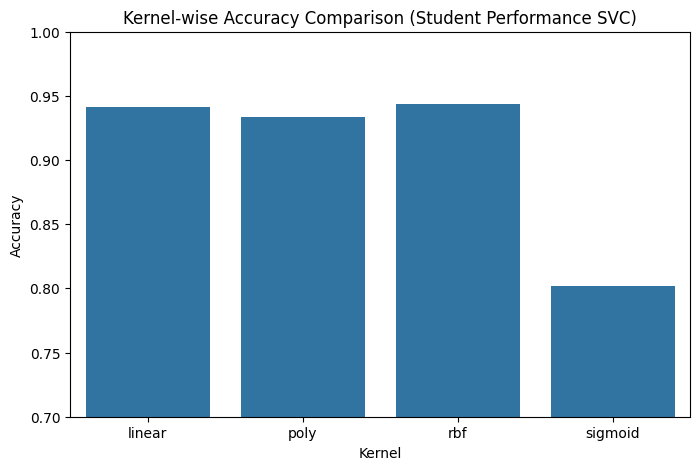

In [ ]:
results_df = pd.DataFrame(results, columns=["Kernel", "Accuracy"])
print("\nSVC Kernel Performance Comparison:")
print(results_df)

plt.figure(figsize=(8,5))
sns.barplot(x="Kernel", y="Accuracy", data=results_df)
plt.ylim(0.7,1.0)
plt.title("Kernel-wise Accuracy Comparison (Student Performance SVC)")
plt.show()

# ***`make_moon Dataset`***

In [ ]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X, y = make_moons(n_samples=500, noise=0.15, random_state=42)

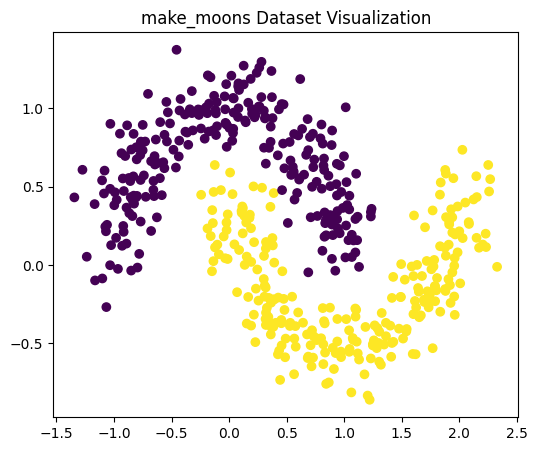

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.title("make_moons Dataset Visualization")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

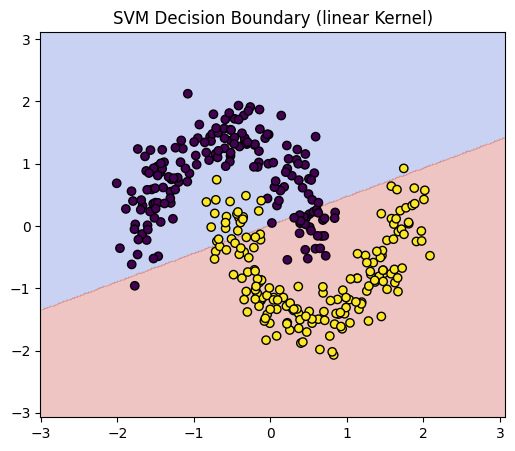

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        75
           1       0.88      0.87      0.87        75

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



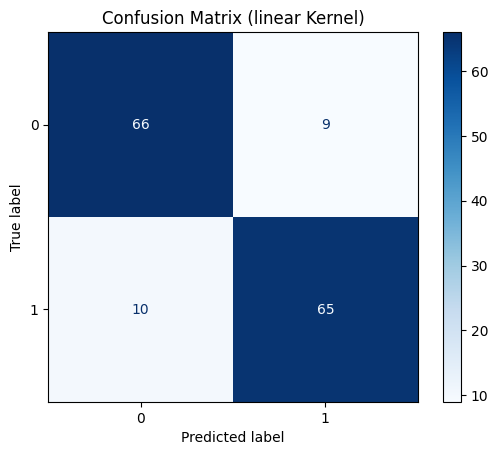

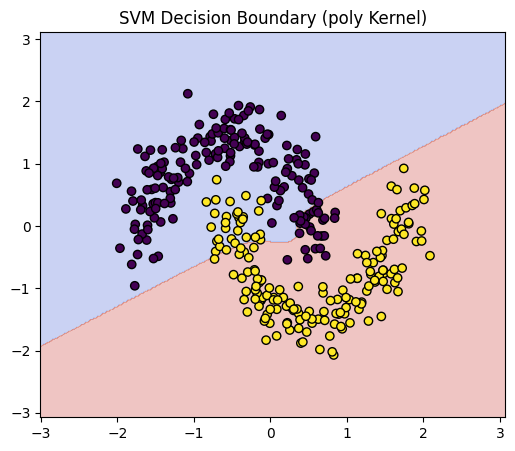

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        75
           1       0.89      0.85      0.87        75

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



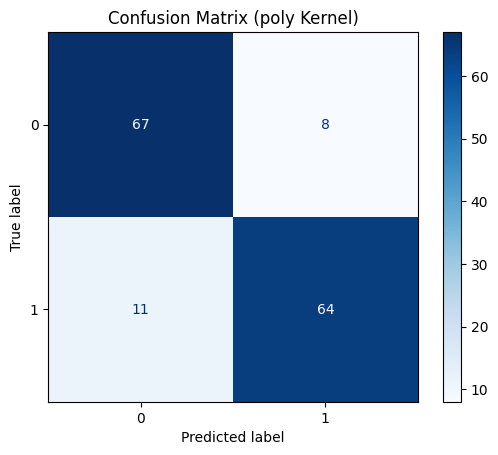

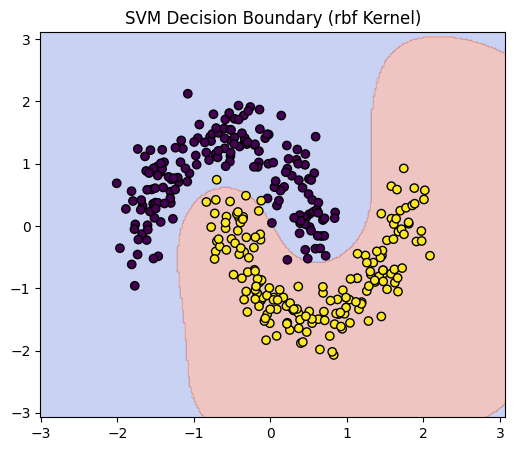

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.96      0.98        75

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



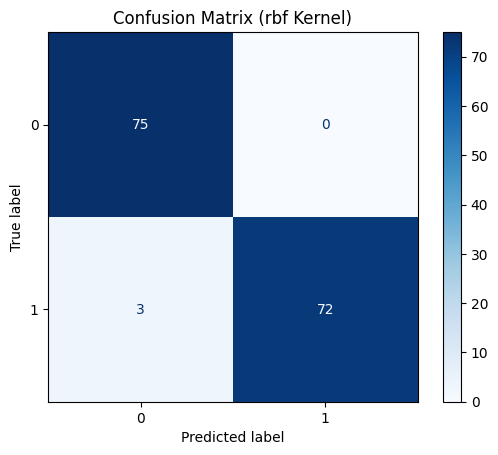

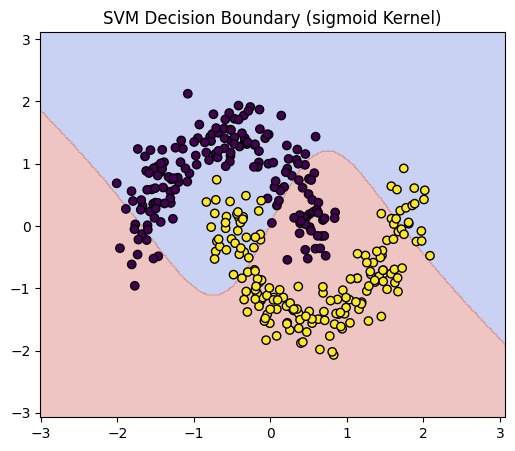

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        75
           1       0.71      0.75      0.73        75

    accuracy                           0.72       150
   macro avg       0.72      0.72      0.72       150
weighted avg       0.72      0.72      0.72       150



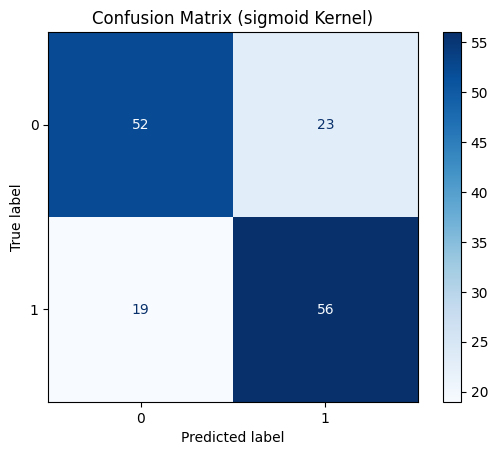

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for k in kernels:
    clf = SVC(kernel=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((k, acc))

    # Decision Boundary Plot
    plt.figure(figsize=(6,5))
    x_min, x_max = X_train[:,0].min()-1, X_train[:,0].max()+1
    y_min, y_max = X_train[:,1].min()-1, X_train[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis', edgecolors='k')
    plt.title(f"SVM Decision Boundary ({k} Kernel)")
    plt.show()

    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix ({k} Kernel)")
    plt.show()


SVC Kernel Performance Comparison (make_moons):
    Kernel  Accuracy
0   linear  0.873333
1     poly  0.873333
2      rbf  0.980000
3  sigmoid  0.720000


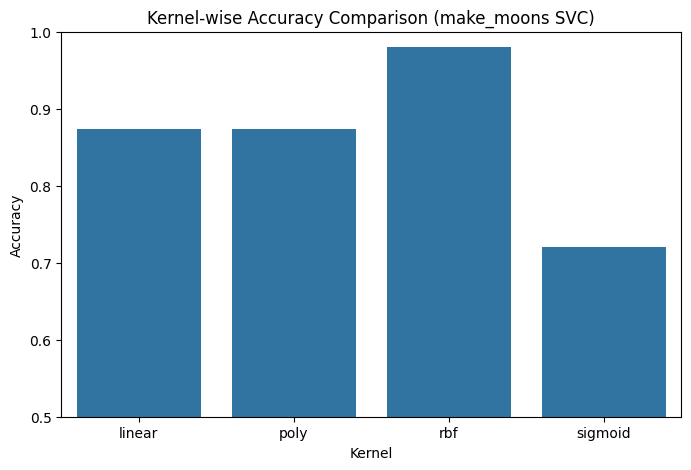

In [ ]:
results_df = pd.DataFrame(results, columns=["Kernel", "Accuracy"])
print("\nSVC Kernel Performance Comparison (make_moons):")
print(results_df)

plt.figure(figsize=(8,5))
sns.barplot(x="Kernel", y="Accuracy", data=results_df)
plt.title("Kernel-wise Accuracy Comparison (make_moons SVC)")
plt.ylim(0.5,1)
plt.show()


# ***MNIST DIGIT DATASET -> https://www.kaggle.com/datasets/oddrationale/mnist-in-csv/data?select=mnist_train.csv***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_df = pd.read_csv("/content/mnist_train.csv")
test_df = pd.read_csv("/content/mnist_test.csv")

In [ ]:
print("Training Dataset")
print(train_df.head())
print("\nTesting Dataset")
print(test_df.head())

Training Dataset
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

Testing Dataset
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0 

In [ ]:
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

In [ ]:
#Normalizing
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train_small = X_train[:9000]
y_train_small = y_train[:9000]
X_test_small = X_test[:2000]
y_test_small = y_test[:2000]

Training SVC with LINEAR kernel...
Accuracy (linear): 89.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       175
           1       0.95      0.99      0.97       234
           2       0.89      0.87      0.88       219
           3       0.85      0.90      0.88       207
           4       0.89      0.94      0.91       217
           5       0.88      0.85      0.87       179
           6       0.90      0.93      0.91       178
           7       0.90      0.86      0.88       205
           8       0.89      0.80      0.84       192
           9       0.89      0.86      0.87       194

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



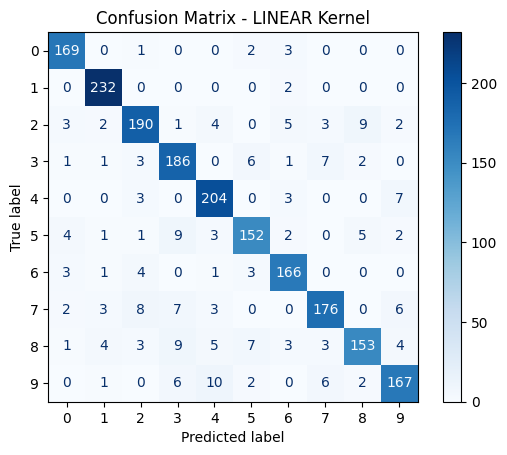

Training SVC with POLY kernel...
Accuracy (poly): 92.95%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       175
           1       0.91      0.99      0.94       234
           2       0.94      0.90      0.92       219
           3       0.93      0.93      0.93       207
           4       0.93      0.95      0.94       217
           5       0.94      0.94      0.94       179
           6       0.93      0.96      0.94       178
           7       0.91      0.90      0.90       205
           8       0.93      0.85      0.89       192
           9       0.93      0.90      0.91       194

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



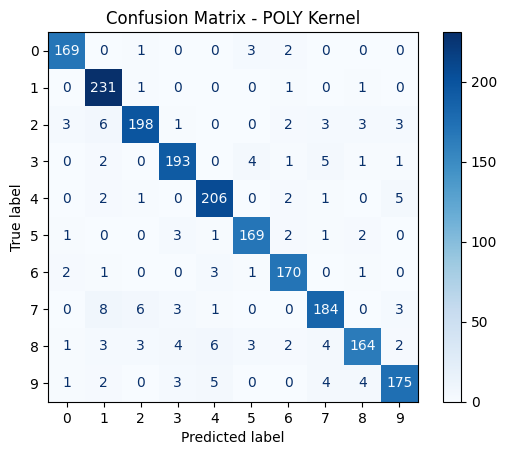

Training SVC with RBF kernel...
Accuracy (rbf): 94.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       175
           1       0.97      0.99      0.98       234
           2       0.94      0.95      0.95       219
           3       0.92      0.92      0.92       207
           4       0.95      0.95      0.95       217
           5       0.94      0.93      0.94       179
           6       0.93      0.95      0.94       178
           7       0.93      0.90      0.92       205
           8       0.94      0.92      0.93       192
           9       0.92      0.91      0.91       194

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



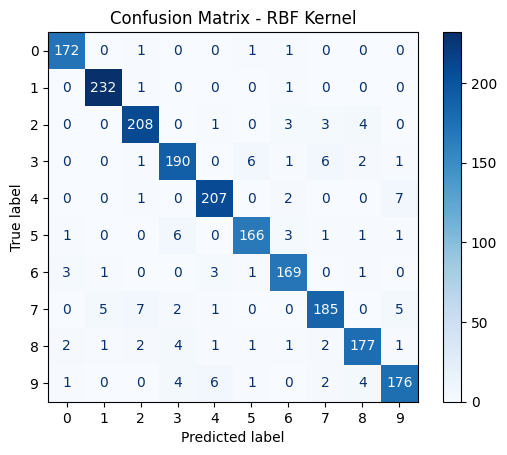

Training SVC with SIGMOID kernel...
Accuracy (sigmoid): 80.70%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       175
           1       0.94      0.97      0.96       234
           2       0.83      0.77      0.80       219
           3       0.81      0.79      0.80       207
           4       0.86      0.86      0.86       217
           5       0.65      0.72      0.68       179
           6       0.87      0.85      0.86       178
           7       0.81      0.78      0.79       205
           8       0.70      0.70      0.70       192
           9       0.76      0.72      0.74       194

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000



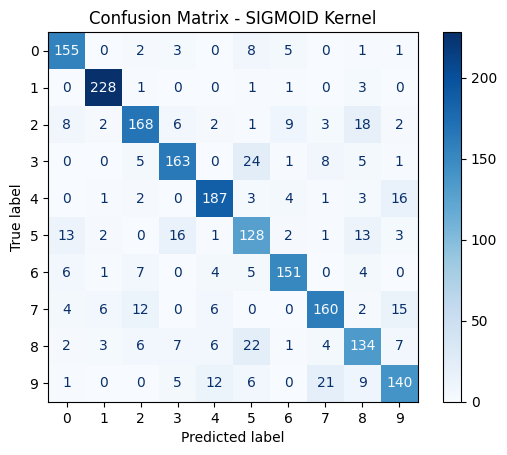

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = {}

for kernel in kernels:
    print(f"Training SVC with {kernel.upper()} kernel...")

    svc = SVC(kernel=kernel, gamma='scale', C=1)
    svc.fit(X_train_small, y_train_small)
    y_pred = svc.predict(X_test_small)

    acc = accuracy_score(y_test_small, y_pred)
    accuracies[kernel] = acc

    print(f"Accuracy ({kernel}): {acc*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test_small, y_pred, zero_division=0))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test_small, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"Confusion Matrix - {kernel.upper()} Kernel")
    plt.show()

    Kernel  Accuracy
0   linear    0.8975
1     poly    0.9295
2      rbf    0.9410
3  sigmoid    0.8070


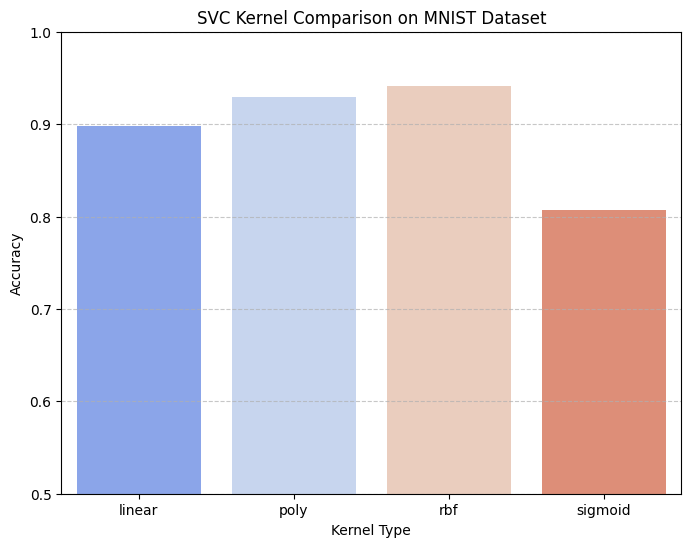

In [ ]:
acc_df = pd.DataFrame({"Kernel": list(accuracies.keys()),
                       "Accuracy": list(accuracies.values())})
print(acc_df)
plt.figure(figsize=(8,6))
sns.barplot(x="Kernel", y="Accuracy", hue="Kernel", data=acc_df, palette="coolwarm", legend=False)
plt.title("SVC Kernel Comparison on MNIST Dataset")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy")
plt.ylim(0.5,1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ***`SVR IMPLEMENTATION`***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_moons

# ***DATASET -1 -> https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression***

In [ ]:
data = pd.read_csv("/content/Student_Performance (1).csv")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
le = LabelEncoder()
data["Extracurricular Activities"] = le.fit_transform(data["Extracurricular Activities"])

In [ ]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [ ]:
data.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [ ]:
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [ ]:
X = data.drop("Performance Index", axis=1)
y = data["Performance Index"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results_student = []

print("STUDENT PERFORMANCE DATASET - SVR")
for k in kernels:
    svr = SVR(kernel=k)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results_student.append(("Student", k, mse, r2))

    print(f"\nKernel: {k}")
    print("MSE:", round(mse, 3))
    print("R²:", round(r2, 3))

STUDENT PERFORMANCE DATASET - SVR

Kernel: linear
MSE: 4.086
R²: 0.989

Kernel: poly
MSE: 4.832
R²: 0.987

Kernel: rbf
MSE: 5.421
R²: 0.985

Kernel: sigmoid
MSE: 4211.315
R²: -10.364



SVR Performance Comparison (Student Performance):
   Dataset   Kernel          MSE         R²
0  Student   linear     4.085951   0.988974
1  Student     poly     4.832404   0.986960
2  Student      rbf     5.420931   0.985372
3  Student  sigmoid  4211.314934 -10.363961


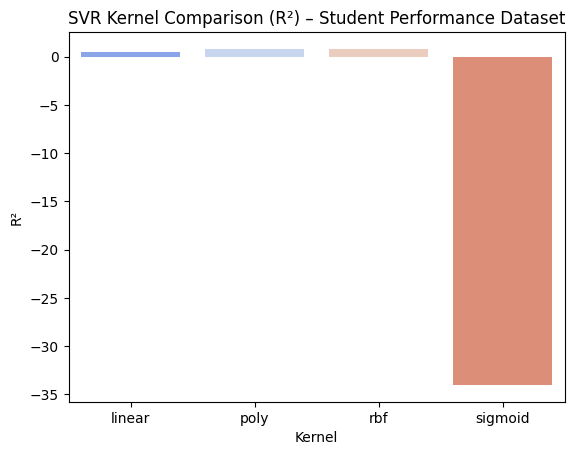

In [ ]:
results_df_student = pd.DataFrame(results_student, columns=["Dataset", "Kernel", "MSE", "R²"])
print("\nSVR Performance Comparison (Student Performance):")
print(results_df_student)

sns.barplot(x="Kernel", y="R²", hue = 'Kernel', data=results_df, palette="coolwarm")
plt.title("SVR Kernel Comparison (R²) – Student Performance Dataset")
plt.show()

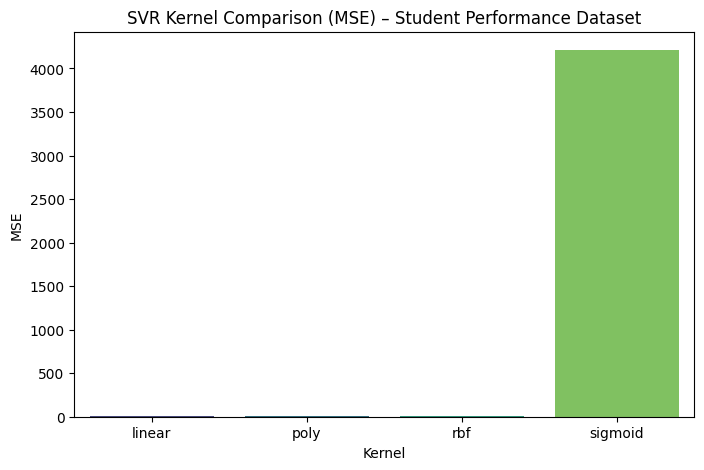

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="Kernel", y="MSE", hue = 'Kernel',data=results_df_student, palette="viridis")
plt.title("SVR Kernel Comparison (MSE) – Student Performance Dataset")
plt.show()


# ***`make_moon Dataset`***

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)
y = y + np.random.normal(0, 0.1, len(y)) # Add slight continuous noise to make regression meaningful

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results_moons = []

for k in kernels:
    svr = SVR(kernel=k)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results_moons.append((k, mse, r2))

    print(f"\nKernel: {k}")
    print("MSE:", round(mse, 3))
    print("R²:", round(r2, 3))


Kernel: linear
MSE: 0.098
R²: 0.628

Kernel: poly
MSE: 0.178
R²: 0.327

Kernel: rbf
MSE: 0.064
R²: 0.757

Kernel: sigmoid
MSE: 52.013
R²: -195.678



SVR Performance Comparison (make_moons dataset):
    Kernel        MSE          R²
0   linear   0.098252    0.628479
1     poly   0.177975    0.327020
2      rbf   0.064384    0.756543
3  sigmoid  52.012993 -195.677784


Text(0.5, 1.0, 'SVR Kernel Comparison (R²) – make_moons')

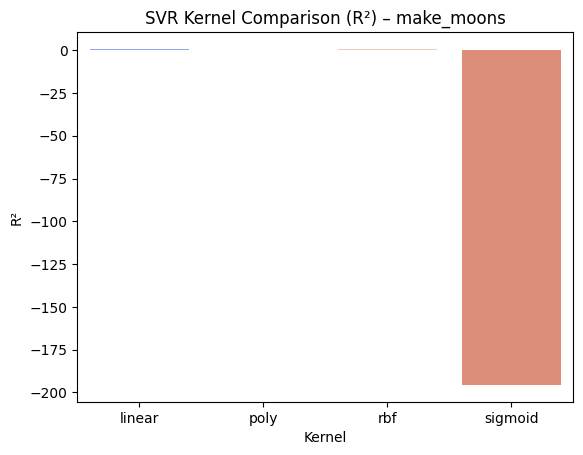

In [ ]:
results_moons_df = pd.DataFrame(results_moons, columns=["Kernel", "MSE", "R²"])
print("\nSVR Performance Comparison (make_moons dataset):")
print(results_moons_df)
# Visualization
sns.barplot(x="Kernel", y="R²", hue = 'Kernel', data=results_moons_df, palette="coolwarm")
plt.title("SVR Kernel Comparison (R²) – make_moons")

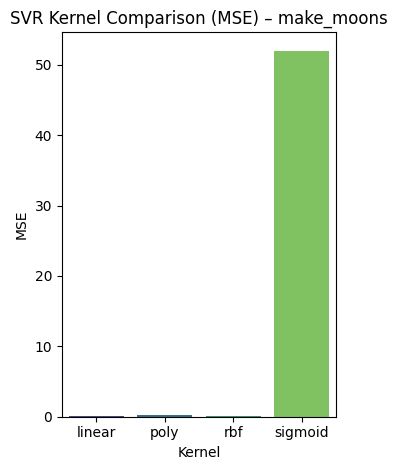

In [ ]:
plt.subplot(1,2,2)
sns.barplot(x="Kernel", y="MSE", hue = 'Kernel' ,data=results_moons_df, palette="viridis")
plt.title("SVR Kernel Comparison (MSE) – make_moons")
plt.tight_layout()
plt.show()

# ***MNIST DIGIT DATASET -> https://www.kaggle.com/datasets/oddrationale/mnist-in-csv/data?select=mnist_train.csv***

In [ ]:
train_df = pd.read_csv("/content/mnist_train.csv")
test_df = pd.read_csv("/content/mnist_test.csv")

In [ ]:
print("Training Dataset")
print(train_df.head())
print("\nTesting Dataset")
print(test_df.head())

Training Dataset
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

Testing Dataset
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0 

In [ ]:
X_train = train_df.iloc[:9000, 1:] / 255.0
y_train = train_df.iloc[:9000, 0]
X_test = test_df.iloc[:2000, 1:] / 255.0
y_test = test_df.iloc[:2000, 0]

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for k in kernels:
    print(f"\nTraining SVR with {k} kernel...")
    svr = SVR(kernel=k, C=1.0, gamma='scale')
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((k, mse, r2))

    print(f"MSE ({k}): {mse:.3f}")
    print(f"R² ({k}): {r2:.3f}")


Training SVR with linear kernel...
MSE (linear): 3.918
R² (linear): 0.519

Training SVR with poly kernel...
MSE (poly): 1.903
R² (poly): 0.766

Training SVR with rbf kernel...
MSE (rbf): 1.527
R² (rbf): 0.813

Training SVR with sigmoid kernel...
MSE (sigmoid): 285.274
R² (sigmoid): -34.017



SVR Kernel Performance Comparison (MNIST):
    Kernel         MSE         R²
0   linear    3.918078   0.519058
1     poly    1.903108   0.766395
2      rbf    1.526630   0.812607
3  sigmoid  285.274207 -34.017236


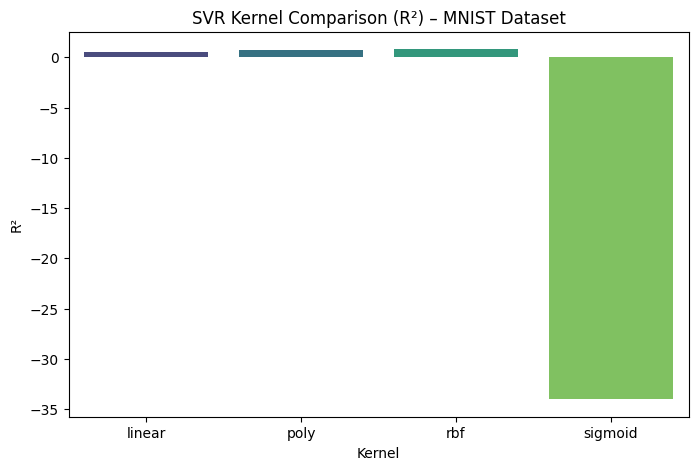

In [ ]:
results_df_mnist = pd.DataFrame(results, columns=["Kernel", "MSE", "R²"])
print("\nSVR Kernel Performance Comparison (MNIST):")
print(results_df_mnist)

plt.figure(figsize=(8,5))
sns.barplot(x="Kernel", y="R²", hue = 'Kernel' ,data=results_df, palette="viridis")
plt.title("SVR Kernel Comparison (R²) – MNIST Dataset")
plt.show()

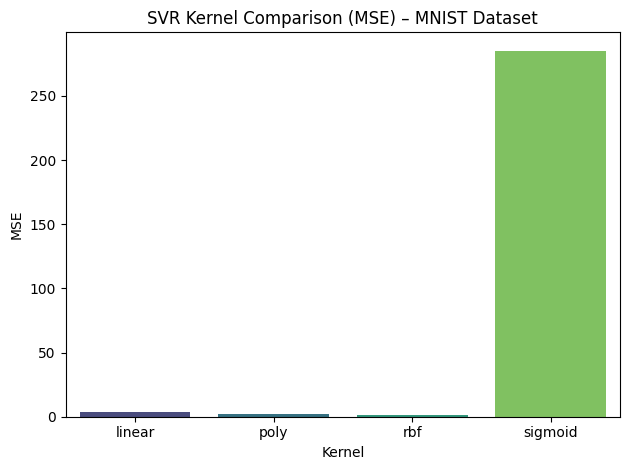

In [ ]:
sns.barplot(x="Kernel", y="MSE", hue = 'Kernel', data=results_df_mnist, palette="viridis")
plt.title("SVR Kernel Comparison (MSE) – MNIST Dataset")
plt.tight_layout()
plt.show()